In [212]:
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
kc=pd.read_csv('kc_house_data.csv')
kc.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4372,3384300100,20141226T000000,160134.0,3,1.5,1190,10116,1.0,0,0,...,7,1190,0,1968,0,98042,47.3850,-122.085,1190,9905
1412,2171400218,20150416T000000,245000.0,4,1.5,1280,8000,1.0,0,0,...,6,1280,0,1960,0,98178,47.4949,-122.255,1420,8211
19212,3401700031,20140822T000000,661000.0,2,1.5,1750,46173,2.0,0,0,...,8,1750,0,1964,0,98072,47.7397,-122.126,2220,42224
2622,8582010240,20140506T000000,606000.0,4,2.5,2110,13850,2.0,0,0,...,9,2110,0,1987,0,98027,47.5497,-122.077,2520,10194
3211,9212900820,20140828T000000,393820.0,2,2.0,1170,8251,1.0,0,0,...,7,1170,0,1941,0,98115,47.6873,-122.291,1360,6798


In [213]:
kc.shape

(21613, 21)

In [214]:
kc.duplicated().any()

False

In [215]:
kc.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [216]:
kc.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [217]:
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [218]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [219]:
kc.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [220]:
kc['date']=kc['date'].map(lambda date : int(date[0:8]))
kc.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16246,2651100050,20150217,400000.0,3,1.0,1180,7537,1.0,0,0,...,7,1180,0,1969,0,98034,47.7233,-122.221,1220,7425
12723,2988800065,20141202,281000.0,2,1.0,1280,12500,1.0,0,0,...,7,1060,220,1951,0,98178,47.4833,-122.237,1460,17771
10965,3626039250,20150428,283000.0,2,1.0,940,6350,1.0,0,0,...,5,940,0,1942,0,98103,47.6980,-122.357,1490,6350
14486,4302200790,20140814,248500.0,2,1.0,720,5160,1.0,0,0,...,6,720,0,1949,0,98106,47.5274,-122.357,990,5160
12972,4232903265,20140918,614950.0,3,1.0,1500,2400,1.5,0,0,...,7,1500,0,1900,0,98119,47.6333,-122.362,1780,3600


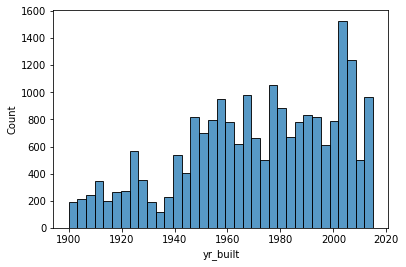

In [221]:
sns.histplot(data=kc,x='yr_built')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


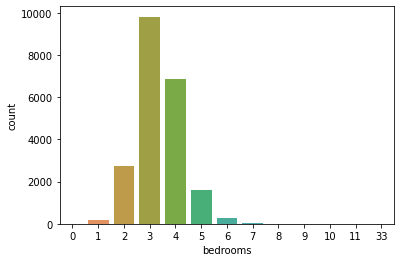

In [222]:
sns.countplot('bedrooms',data=kc)
# most of the houses have 2 ,3 or 4 bedrooms

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


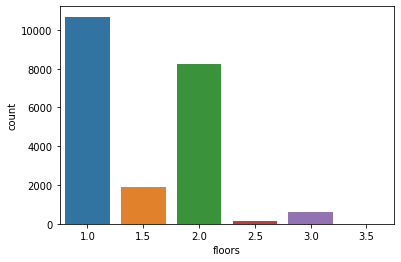

In [223]:
sns.countplot('floors',data=kc)
# most of the houses have 1 or 2 floors

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


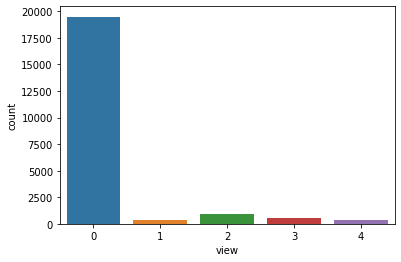

In [224]:
sns.countplot('view',data=kc)
# most of the houses have 0 view

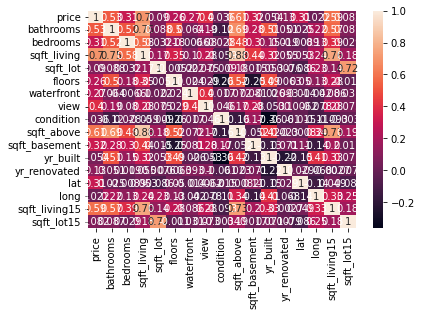

In [225]:
# We make a new dataframe(kc1) that doesnt inlude all the unecessary features
# from kc1 we make a correlation map 
kc1=kc[[ 'price','bathrooms','bedrooms' ,'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
corrMatrix = kc1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

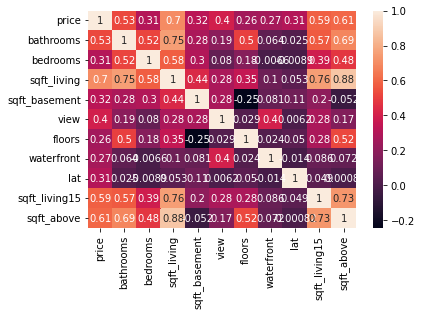

,price,bathrooms,bedrooms,sqft_living,sqft_basement,view,floors,waterfront,lat,sqft_living15,sqft_above
10457,654300.0,2.50,3,2490,0,0,2.0,0,47.6250,2870,2490
20821,837000.0,2.75,5,2940,180,0,2.0,0,47.6879,3090,2760
20090,551500.0,2.50,4,2950,0,0,2.0,0,47.4890,2790,2950
1176,565000.0,2.50,3,2500,0,0,2.0,0,47.7441,2790,2500
18517,698000.0,1.75,3,1220,0,0,1.0,0,47.6886,1340,1220


In [226]:
# price,bathrooms ,bedrooms ,sqft_living ,sqft_basement, view, floors ,waterfront, lat ,sqft_living15, sqft_above all 
# play an important role in deciding the output which is the price
# i came to this conclusion by using some logic and the correlation map
#we make a new dataframe (kc2) that includes these important factors to use them in the ML process 
kc2=kc[['price','bathrooms','bedrooms','sqft_living','sqft_basement','view','floors','waterfront','lat','sqft_living15','sqft_above']]
corrMatrix = kc2.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
kc2.sample(5)

In [227]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
x=kc2['sqft_living'].values[:,np.newaxis]
y=kc2['price'].values
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=30)
#Here we split our data to train data which is 80% of our total data and the rest(20% of our total data) will be tested later

MSE 64179676631.68388
R squared 0.4879814110728805


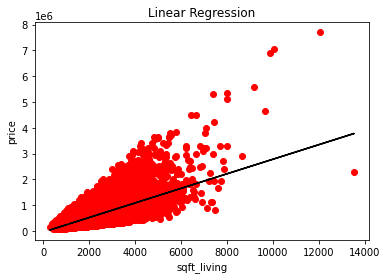

In [228]:
# we make a linear regression model based on 1 feature and test the accuracy of our model
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.plot(x,model.predict(x),color="k")
plt.show()
# as we can see below the R squared is 0.37 which is below 0.5 , that means our model got less than half of the outputs correct

MSE 43022103023.76466
R squared 0.6567742681328747


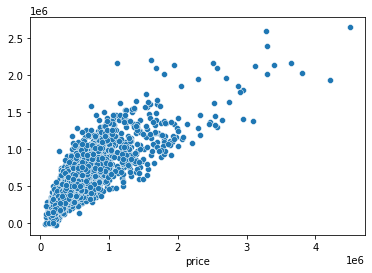

In [229]:
x=kc2.drop('price',axis=1)  #we have more than one input
y=kc2["price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
y_predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,y_predicted))
print("R squared", metrics.r2_score(y_test,y_predicted))
test_residuals=y_test-y_predicted
sns.scatterplot(x=y_test,y=y_predicted)
# as we can see below the R squared is equal tp 0.65 which is above 0.5 , that means our model got more than half of the outputs correct
# our model has improved because we added another features (bathrooms	bedrooms sqft_basement	view	floors	waterfront	lat	sqft_living15	sqft_above)

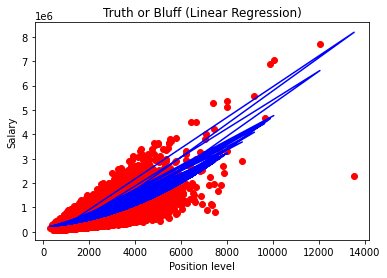

In [230]:
# since we want to use all of our best features to make a good ML model we will use plynomial regression
from sklearn.preprocessing import PolynomialFeatures 
x1=kc2['sqft_living'].values[:,np.newaxis]
y1=kc2["price"]

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(x1)
poly_reg.fit(X_poly, y1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y1)

plt.scatter(x1, y, color = 'red')
plt.plot(x1, lin_reg_2.predict(X_poly), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [231]:
print("MSE", mean_squared_error(y1,lin_reg_2.predict(X_poly)))
print("R squared", metrics.r2_score(y1,lin_reg_2.predict(X_poly)))


MSE 62975083210.96574
R squared 0.5327430940591443
